# Student Details
Name :Lujana Bajracharya

Student Id: 2065878

Group: L5CG14

Module Leader: Mr. Siman Giri

Assitant Module Leader: Mr. Anmol Adhikari


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Necessary Inputs
#Importing numpy to use array, lists related operations in an easy-use way
import numpy as np
#Importing statsmodels.api library to perform the linear regression.
import statsmodels.api as sm
#Importing matplotlib.pyplot i.e. collection of command style functions that make matplotlib work
import matplotlib.pyplot as plt
#Importing Seaborn a Python data visualization library built on top of Matplotlib
import seaborn as sns 
#Importing pandas an open source data analysis library built on top of the Python programming language
import pandas as pd

#importing tran_test_split for training and testing data
from sklearn.model_selection import train_test_split

In [ ]:
#path of file
path = "/content/drive/MyDrive/Workshop2/9.csv"


# Part-II: Logistic Regression[17.5]:

## 1. Data Understanding, Cleaning and Transformation[2]:
Understand what is data about and why do you think the data was collected, and what research questions
data can answers.

(a) You can explain your logic in the text cell of your notebook.

(b) Based on your research questions Identify Dependent and Independent Variables.

(c) Use pandas to load your dataset and observe the data.
If required perform basic data cleaning and Transformation the way you fits your task requirements.

In [ ]:
#reading data of csv file stored in path variable
path_dataset = pd.read_csv(path)
#head()gives first five data
path_dataset.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Urban,186.21,29.0,formerly smoked,1


The given dataset helps to predict the chances of stroke in person based upon gender, age, hypertension, heart_disease, and so on. On this dataset, we will be performing logistic regression from scratch

Column Information
Gender: Sex of a patient(Male, Female, or Other)

Age: This column stores age of a patient.

Hypertension: Value is 0 for patient who doesn't have hypertension and vice versa.

Heart_disease: Value if 0 for patient who doesn't have any heart disease and 1 for patient who have heart disease

ever_married: If patient is married, value =1 and if patient is unmarried, value  = 0.

Residence_type: Tells if person lives in rural areas or urban areas.

avg_glucose_lvel: This column is to determing average glucose level of a patient.

smoking_status: This column tells if patient has smoked or not.

stroke: If patient had stroke value =1, or value =0 if patient had no stroke

In [ ]:
#isnull to check if any null value is present in dataset
path_dataset.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
#duplicated to check if any duplicate value is present in dataset
path_dataset.duplicated().sum()

0

In [ ]:
#dtypes gives data type of each column
path_dataset.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
#info() method prints information about the DataFrame
path_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5069 entries, 0 to 5068
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5069 non-null   object 
 1   age                5069 non-null   float64
 2   hypertension       5069 non-null   int64  
 3   heart_disease      5069 non-null   int64  
 4   ever_married       5069 non-null   object 
 5   Residence_type     5069 non-null   object 
 6   avg_glucose_level  5069 non-null   float64
 7   bmi                5069 non-null   float64
 8   smoking_status     5069 non-null   object 
 9   stroke             5069 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 396.1+ KB


In [ ]:
#missing values for an array-like object such as NaN, NaT
path_dataset.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
#unique() method gives unique values of a column
path_dataset['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
#changing categorical data to numerical data 
#map method to replace unqiue values by ordinal 
path_dataset['ever_married'] = path_dataset['ever_married'].map({'Yes':1, 'No':0})
path_dataset[['ever_married']]

,ever_married
0,1
1,1
2,1
3,1
4,1
...,...
5064,0
5065,1
5066,1
5067,1


In [ ]:
#unique() method gives unique values of a column
path_dataset['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [ ]:
#changing categorical data to numerical data 
#map method to replace unqiue values by ordinal 
path_dataset['Residence_type'] = path_dataset['Residence_type'].map({'Urban':1, 'Rural':0})
path_dataset[['Residence_type']]

,Residence_type
0,1
1,0
2,1
3,0
4,1
...,...
5064,0
5065,1
5066,0
5067,0


In [ ]:
#unique() method gives unique values of a column
path_dataset['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [ ]:
#changing categorical data to numerical data 
#map method to replace unqiue values by ordinal 
path_dataset['smoking_status'] = path_dataset['smoking_status'].map({'formerly smoked':1, 'never smoked':2, 'smokes':3,'Unknown':4})
path_dataset[['smoking_status']]

,smoking_status
0,1
1,2
2,3
3,2
4,1
...,...
5064,4
5065,2
5066,2
5067,1


In [ ]:
#unique() method gives unique values of a column

path_dataset['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [ ]:
#changing categorical data to numerical data 
#map method to replace unqiue values by ordinal 
path_dataset['gender'] = path_dataset['gender'].map({'Male':1, 'Female':2, 'Other':3})
path_dataset[['gender']]

,gender
0,1
1,1
2,2
3,2
4,1
...,...
5064,2
5065,2
5066,2
5067,1


In [ ]:
#isnull method to check null values 
path_dataset.isnull().values.sum()

0

In [ ]:
#head() method gives first 5 values 
path_dataset.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,0,105.92,32.5,2,1
2,2,49.0,0,0,1,1,171.23,34.4,3,1
3,2,79.0,1,0,1,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,186.21,29.0,1,1


In [ ]:
for col in path_dataset: # iteration for accessing each column of datasets
  if col in ["age", "avg_glucose_level", "bmi" , "smoking_status"]: # checking name of columns
    print ("For column: ",col.upper()) #prints name of column in uppercase

    print ('Sum = ', path_dataset[col].sum(),'.') # return sum of all values of column 

    print('Mean = {:.2f}'.format(path_dataset[col].mean()),'.') # returns mean of column in float type

    print('Median = ',path_dataset[col].median(),'.') # returns median of column 

    print('Standard Deviation = {:.2f}'.format(path_dataset[col].std()),'.') # returns standard deviation of column in float
    
    print('Maximum = ',path_dataset[col].max(),'.') # returns maximum values of column

    print('Minimum = ',path_dataset[col].min(),'.') # returns minimum values of column
    print('\n')
    


For column:  AGE
Sum =  218392.36 .
Mean = 43.08 .
Median =  45.0 .
Standard Deviation = 22.58 .
Maximum =  82.0 .
Minimum =  0.08 .


For column:  AVG_GLUCOSE_LEVEL
Sum =  537366.4299999999 .
Mean = 106.01 .
Median =  91.85 .
Standard Deviation = 45.13 .
Maximum =  271.74 .
Minimum =  55.12 .


For column:  BMI
Sum =  146758.28 .
Mean = 28.95 .
Median =  28.1 .
Standard Deviation = 8.39 .
Maximum =  97.6 .
Minimum =  0.0 .


For column:  SMOKING_STATUS
Sum =  13108 .
Mean = 2.59 .
Median =  2.0 .
Standard Deviation = 1.09 .
Maximum =  4 .
Minimum =  1 .




In [ ]:
#describe method returns the statistical summary of the dataframe
path_dataset.describe()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5069.000000,5069.000000,5069.000000,5069.000000,5069.000000,5069.000000,5069.000000,5069.000000,5069.000000,5069.000000
mean,1.587098,43.083914,0.097061,0.053265,0.654962,0.507201,106.010343,28.952117,2.585914,0.042809
std,0.492805,22.583033,0.296069,0.224583,0.475428,0.499997,45.128178,8.394409,1.091135,0.202447
min,1.000000,0.080000,0.000000,0.000000,0.000000,0.000000,55.120000,0.000000,1.000000,0.000000
25%,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,77.260000,23.500000,2.000000,0.000000
50%,2.000000,45.000000,0.000000,0.000000,1.000000,1.000000,91.850000,28.100000,2.000000,0.000000
75%,2.000000,61.000000,0.000000,0.000000,1.000000,1.000000,114.020000,33.300000,4.000000,0.000000
max,3.000000,82.000000,1.000000,1.000000,1.000000,1.000000,271.740000,97.600000,4.000000,1.000000


###Box Plot

A box plot, also called whisker plot, is used to display data like maximum, minimum, first quartile, median or second quartile, third quartile, and maximum. The lowest horizontal line represents minimum value of data whereas highest represents maximum value. The lower line of rectangle is Q1, whereas the upper line of rectangle is Q3. The line between Q1 and Q3 is median. The data that are greater than Q3+(1.5.IQR) or less than Q1-(1.5.IQR) are called outliers. IQR means interquartile range i.e. the difference between Q1 and Q3.

Text(0, 0.5, 'Age of People')

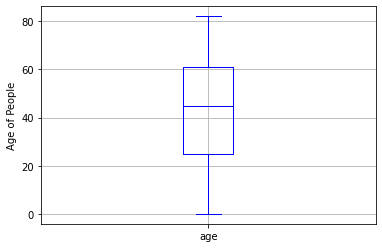

In [ ]:
#boxplot to get Q1, median, Q3, minimum and maximum of column age
path_dataset.boxplot(column = ['age'], grid = True, color ='blue')
plt.ylabel("Age of People") #label for y axis

Text(0, 0.5, 'Body Mass Index')

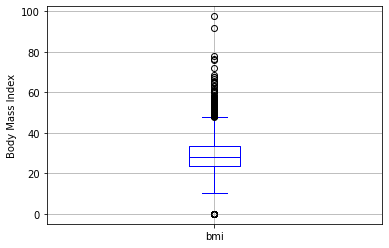

In [ ]:
#boxplot to get Q1, median, Q3, minimum and maximum of bmi age
path_dataset.boxplot(column = ['bmi'], grid = True, color ='blue')
plt.ylabel("Body Mass Index")

Text(0, 0.5, 'smoking_status')

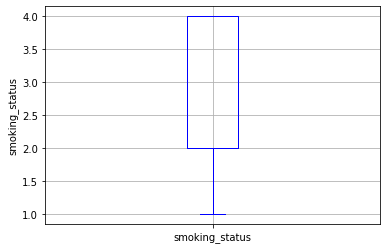

In [ ]:
#boxplot to get Q1, median, Q3, minimum and maximum of column smoking status
path_dataset.boxplot(column = ['smoking_status'], grid = True, color ='blue')
plt.ylabel("smoking_status")

In [ ]:
w_Q1 = path_dataset['bmi'].quantile(0.25) #First quartile of dataset
w_Q3 = path_dataset['bmi'].quantile(0.75) #Third Quartile of dataset
w_IQR = w_Q3 - w_Q1

# Observing outliers by checking for values outside of the range [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
outliers = (path_dataset['bmi'] < w_Q1 - 1.5*w_IQR) | (path_dataset['bmi'] > w_Q3 + 1.5*w_IQR)
path_dataset[outliers]

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
17,2,52.0,1,0,1,1,233.29,48.9,2,1
93,2,45.0,0,0,1,0,224.10,56.6,2,1
222,2,47.0,0,0,1,1,210.95,50.1,4,0
226,2,74.0,1,0,1,1,205.84,54.6,2,0
238,2,57.0,1,0,1,0,129.54,60.9,3,0
...,...,...,...,...,...,...,...,...,...,...
4747,2,58.0,0,0,1,1,66.71,51.7,2,0
4806,2,51.0,0,0,1,1,107.72,60.9,4,0
4874,2,53.0,0,0,1,1,70.51,54.1,2,0
4917,1,51.0,1,0,1,0,211.83,56.6,2,0


Text(0, 0.5, 'Average Gloucose Level')

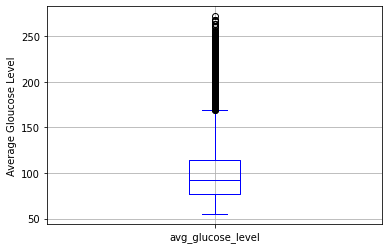

In [ ]:
#boxplot to get Q1, median, Q3, minimum and maximum of column avg_glucode_level
path_dataset.boxplot(column = ['avg_glucose_level'], grid = True, color ='blue')
plt.ylabel("Average Gloucose Level")

Text(0, 0.5, 'Hypertension')

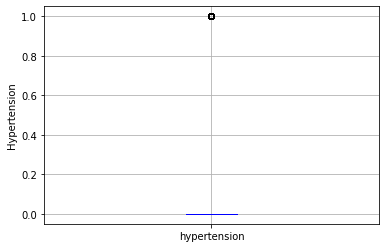

In [ ]:
#boxplot to get Q1, median, Q3, minimum and maximum of column hypertension
path_dataset.boxplot(column = ['hypertension'], grid = True, color ='blue')
plt.ylabel("Hypertension")

Text(0, 0.5, 'Average Gloucose Level')

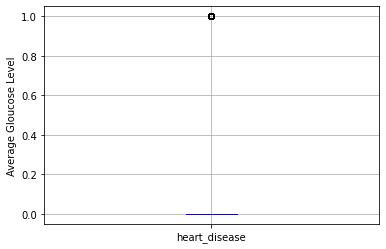

In [ ]:
#boxplot to get Q1, median, Q3, minimum and maximum of column heart disease

path_dataset.boxplot(column = ['heart_disease'], grid = True, color ='blue')
plt.ylabel("Average Gloucose Level")

Text(0, 0.5, 'Gender')

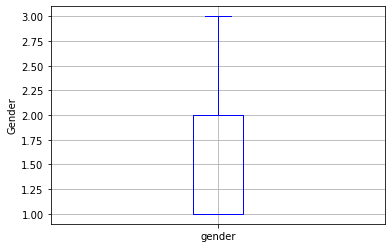

In [ ]:
#boxplot to get Q1, median, Q3, minimum and maximum of column gender

path_dataset.boxplot(column = ['gender'], grid = True, color ='blue')
plt.ylabel("Gender")

In [ ]:
#Importing Plotly Express library
import plotly.express as px
fig = px.scatter(path_dataset, x="bmi", y="smoking_status", color="stroke",
                 size='stroke', hover_data=['smoking_status'])
fig.update_layout(title='Relationship between BMI, Smoking Status, and Stroke')
fig.show()

<Figure size 2160x2160 with 0 Axes>

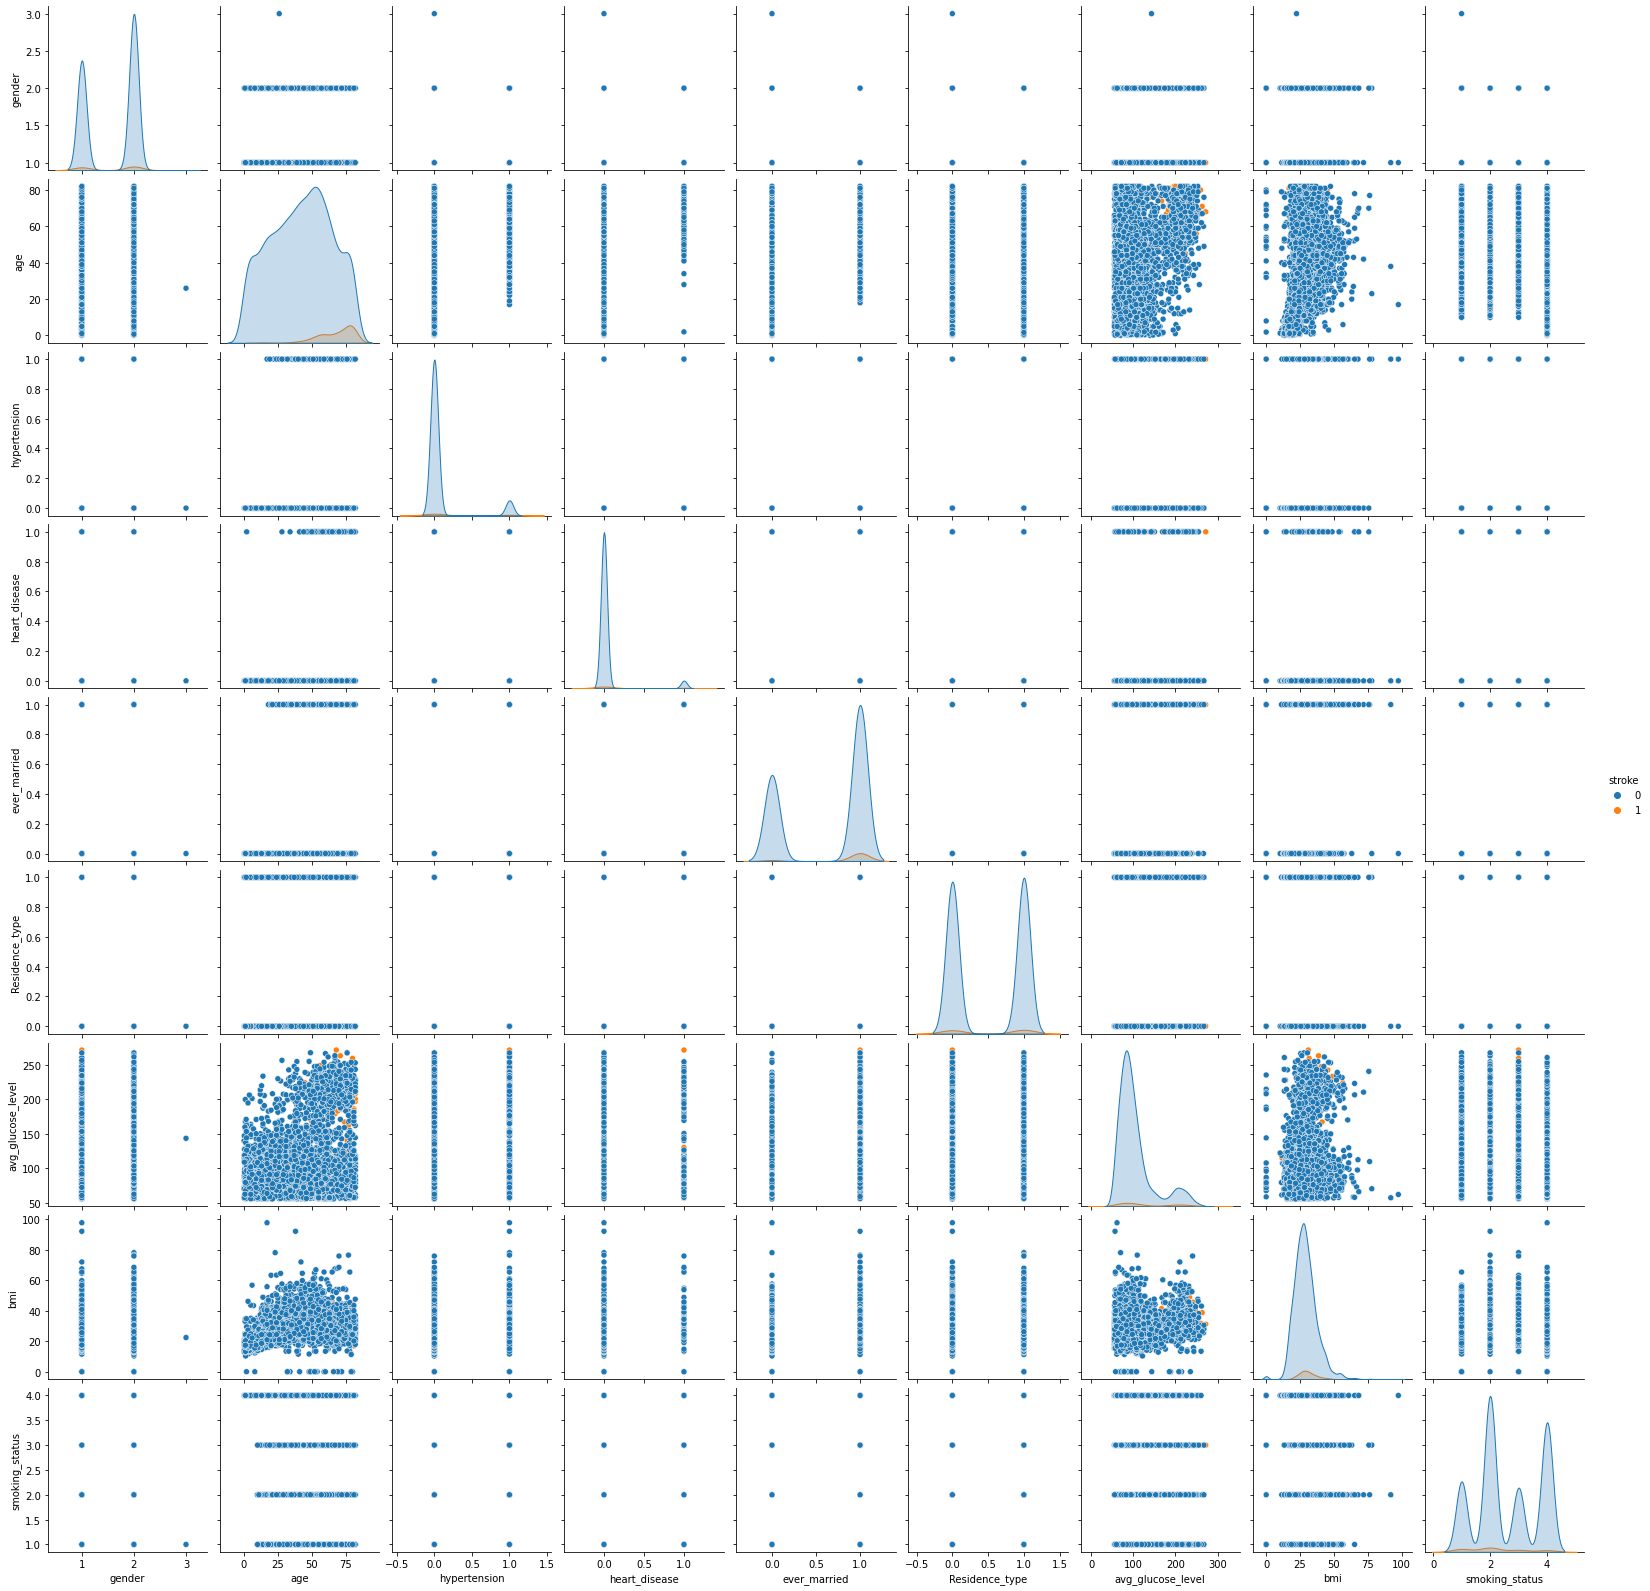

In [ ]:
plt.figure(figsize=(30, 30))
sns.pairplot(path_dataset, hue="stroke")
plt.show()

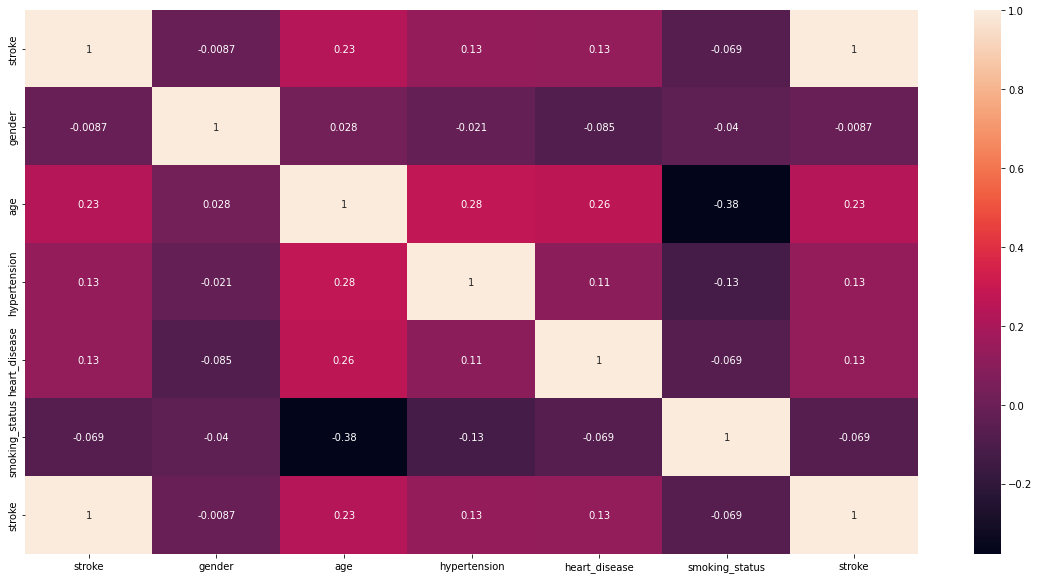

In [ ]:
#Heatmap using Seaborn library to visualize the correlation matrix of independent variable
plt.rcParams["figure.figsize"] = (20,10)
sns.heatmap(path_dataset[["stroke","gender",	"age",	"hypertension",	"heart_disease",	"smoking_status",	"stroke"]].corr(), annot=True)
plt.show()

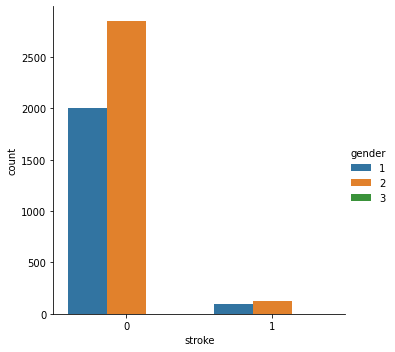

In [ ]:
#catplot function of seaborn to create bar cahrt of stroke against gender
sns.catplot(x="stroke", kind="count", data=path_dataset, hue="gender");

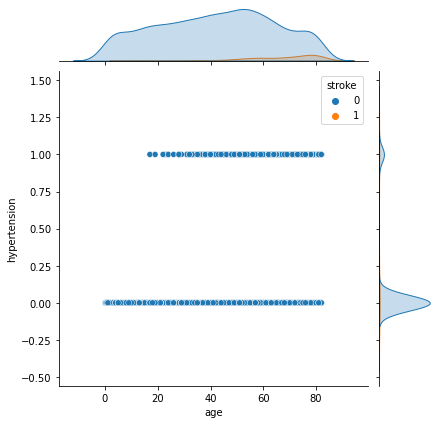

In [ ]:
#joinplot of Seaborn to create scatter plot
sns.jointplot(data=path_dataset, x="age", y="hypertension", hue="stroke");


In [ ]:
#head() gives first five data
path_dataset.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,0,105.92,32.5,2,1
2,2,49.0,0,0,1,1,171.23,34.4,3,1
3,2,79.0,1,0,1,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,186.21,29.0,1,1


In [ ]:
#dropping dataset that have numerous outliers and not necessary
dataset = path_dataset.drop(["ever_married", "Residence_type", "avg_glucose_level", "bmi"],  axis='columns')

In [ ]:
#dataset after dropping uneccessary columns
dataset

,gender,age,hypertension,heart_disease,smoking_status,stroke
0,1,67.0,0,1,1,1
1,1,80.0,0,1,2,1
2,2,49.0,0,0,3,1
3,2,79.0,1,0,2,1
4,1,81.0,0,0,1,1
...,...,...,...,...,...,...
5064,2,13.0,0,0,4,0
5065,2,81.0,0,0,2,0
5066,2,35.0,0,0,2,0
5067,1,51.0,0,0,1,0


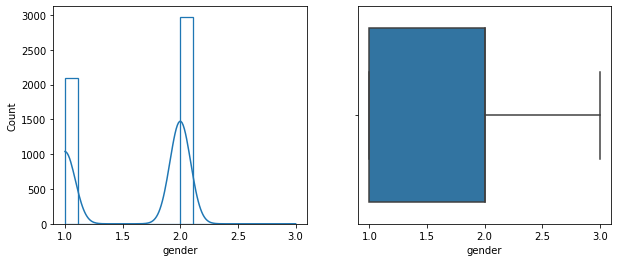

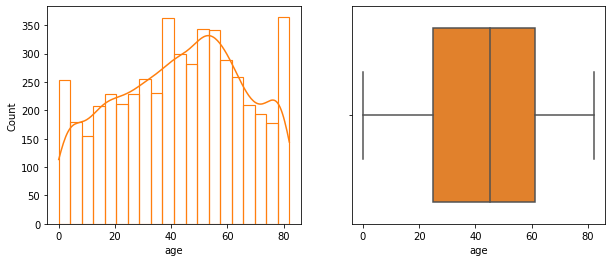

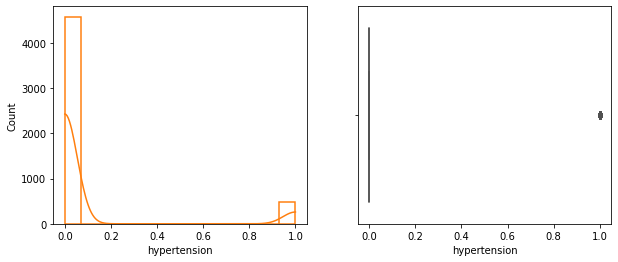

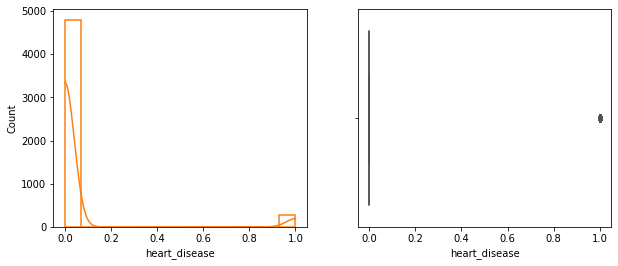

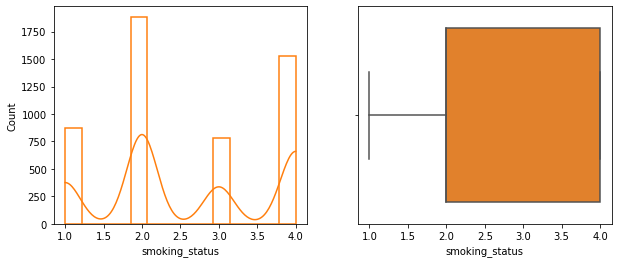

In [ ]:
# Color palette of seaborn library
colors = sns.color_palette()

# Plotting of histograms and box plot

fig, (ax1, ax2) = plt.subplots(figsize = (10,4), ncols=2)
sns.histplot(data=path_dataset, x="gender", fill=False, kde=True, ax=ax1, color=colors[0]);
sns.boxplot(data=path_dataset, x="gender", ax = ax2, color=colors[0]);

fig, (ax1, ax2) = plt.subplots(figsize = (10,4), ncols=2)
sns.histplot(data=path_dataset, x="age", fill=False, kde=True, ax=ax1, color=colors[1]);
sns.boxplot(data=path_dataset, x="age", ax = ax2, color=colors[1]);

fig, (ax1, ax2) = plt.subplots(figsize = (10,4), ncols=2)
sns.histplot(data=path_dataset, x="hypertension", fill=False, kde=True, ax=ax1, color=colors[1]);
sns.boxplot(data=path_dataset, x="hypertension", ax = ax2, color=colors[1]);

fig, (ax1, ax2) = plt.subplots(figsize = (10,4), ncols=2)
sns.histplot(data=path_dataset, x="heart_disease", fill=False, kde=True, ax=ax1, color=colors[1]);
sns.boxplot(data=path_dataset, x="heart_disease", ax = ax2, color=colors[1]);


fig, (ax1, ax2) = plt.subplots(figsize = (10,4), ncols=2)
sns.histplot(data=path_dataset, x="smoking_status", fill=False, kde=True, ax=ax1, color=colors[1]);
sns.boxplot(data=path_dataset, x="smoking_status", ax = ax2, color=colors[1]);


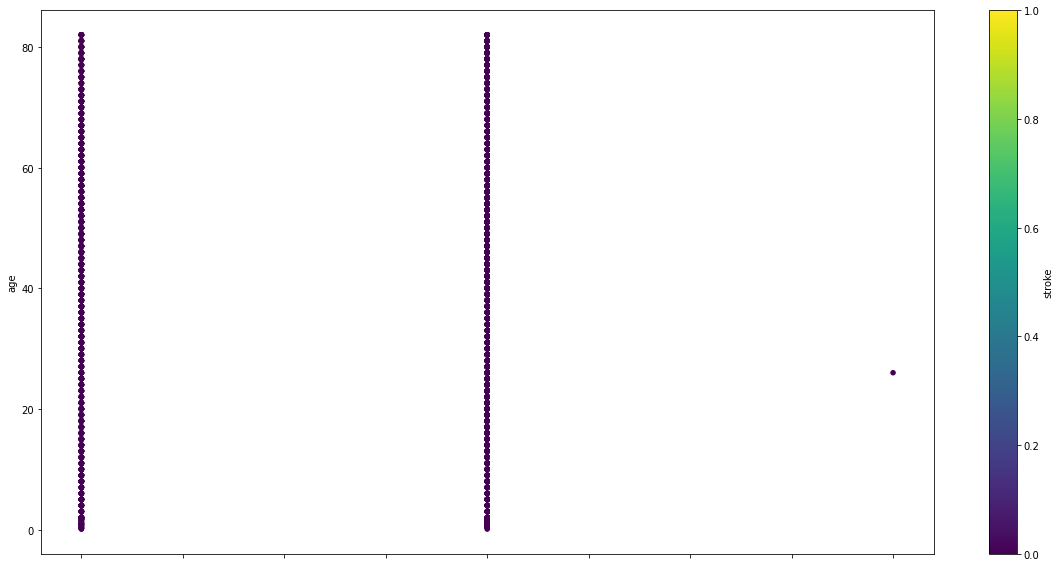

In [ ]:
path_dataset.plot.scatter(x='gender',y='age',c='stroke',colormap='viridis')

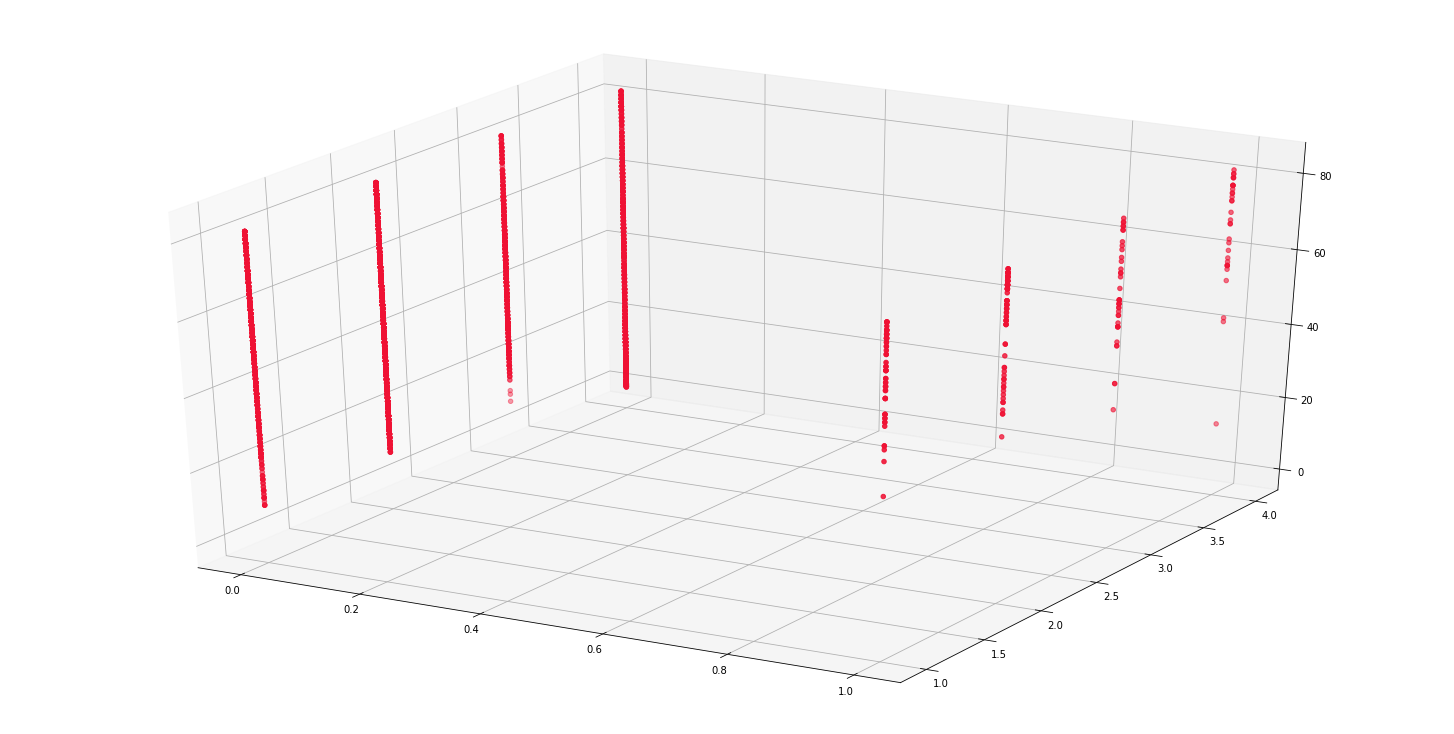

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
# Ploting variables stroke, smoking_Status,and age 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(path_dataset['stroke'], path_dataset['smoking_status'], path_dataset['age'], color='#ef1234')
plt.show()

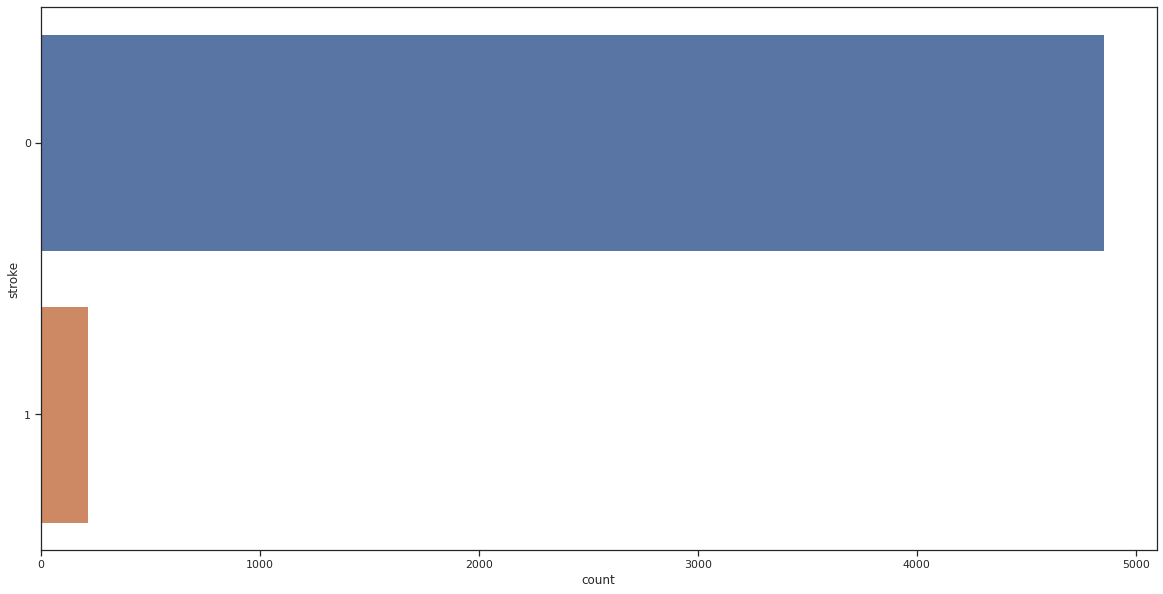

In [ ]:
#counting stroke based upon 0 and 1
sns.set(style="ticks", color_codes=True)
sns.countplot(y='stroke', data=path_dataset)

# 3. Build Primary Model[Logistic Regression][5]:
Once you have cleaned, transformed and Visualize your data build Logistic Regression Model from Scratch.

## Step 1: Sigmoid Function

A statistical analysis method called logistic regression uses previous observations from a data set to predict a binary outcome, such as yes or no. It is based upon sigmoid function.

The sigmoid funtion is a funtion which takes real-valued number as input and returns a value ranges 0-1. That value can be observed as probability. Formula for Sigmoid Funtion:

**sigmoid**(z) = 1 / (1 + exp(-z))
 
Here, varibale 'exp' is exponential function. 





##Step 2 : Cost Function
In logistic regression, the cost function is used to evaluate the difference between expected and observed values for the dependent variable. The "log loss" or "cross-entropy loss" function is another name for the cost function.
It is defined as follows:

J(θ) = (-1/m) * [ ∑(y*log(h(x;θ)) + (1-y)*log(1-h(x;θ))) ]

where:

J(θ) is the cost function

θ is the vector of parameters

m is the number of training examples

y is the actual output value (0 or 1) of the dependent variable

h(x;θ) is the predicted output value (between 0 and 1) of the dependent variable for a given input example x

## Step 3: Implementation of  Gradient Descent

The gradient is a vector that points in the direction of steepest ascent of the cost function. By modifying the model parameters, the iterative optimization process gradient descent minimizes a cost function. It is used in logistic regression to identify the ideal coefficient values that minimize the cost function and yield the most accurate predictions for the input data. The procedure estimates the cost function's gradient with respect to the coefficients at each iteration, and then updates the coefficients in the direction of the steepest descent. The step size of the update is determined by the learning rate, and a good learning rate is essential for the algorithm to converge. The process continues until either a maximum number of iterations is reached or the change in the cost function between iterations is less than a predetermined threshold.

## Step 4: Training the model
The logistic regression model has been trained and is prepared to make predictions after completing gradient descent. In general, the trained model is a set of weights that have been optimized and will be used to predictions on incoming data.


In [ ]:
# Define sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
# Define cost function
#X = input features, y = target variable, theta = coefficients for logistic regression
def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(X .dot( theta)) #analyze predicted output for X and theta using sigmoid function
    J = -1 * (1/m) * (np.log(h).T.dot(y) + np.log(1-h).T.dot(1-y)) #cost function
    return J

In [ ]:
# Define gradient function
def gradient(X, y, theta):
    m = len(y)
    h = sigmoid(X.dot(theta))
    grad = (1/m) * X.T.dot(h-y)
    return grad

In [ ]:
# Logistic regression function
def logistic_regression(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = np.zeros((num_iters, 1)) #store the cost function history over the gradient descent iterations
    
    for i in range(num_iters): #loop ranges to num_iters to compute gradient of cost function
        grad = gradient(X, y, theta) #gives gradient of cost funtion with respect to theta
        theta = theta - alpha * grad #updating value of theta
        J_history[i] = cost_function(X, y, theta) #calculates cost funtion and updates J_history array
        
    return theta, J_history

In [ ]:
# X array for independent variable and y array for dependent variable
X = np.array(dataset[['gender', 'age', 'hypertension', 'heart_disease', 'smoking_status']]) 
y = np.array(dataset[['stroke']])

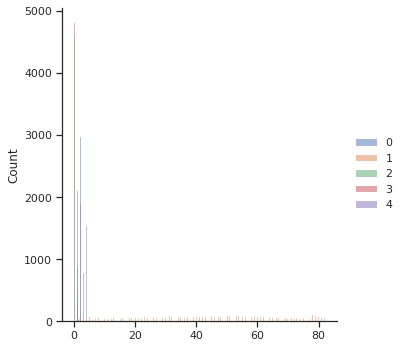

In [ ]:
sns.displot(X)

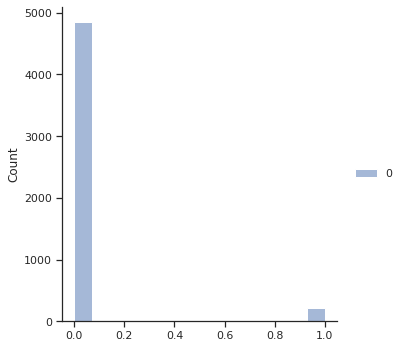

In [ ]:
sns.displot(y)

In [ ]:
m, n = X.shape
theta = np.zeros((n, 1))
alpha = 0.01
num_iters = 1000


In [ ]:
cost_fun = cost_function(X, y, theta)
cost_fun

array([[0.69314718]])

In [ ]:
grad = gradient(X, y, theta)
grad

array([[7.26474650e-01],
       [1.86267863e+01],
       [3.62990728e-02],
       [1.83468140e-02],
       [1.19747485e+00]])

In [ ]:
theta, J_history = logistic_regression(X, y, theta, alpha, num_iters)
print(theta)

[[-0.49154322]
 [-0.00542629]
 [ 0.05813193]
 [ 0.04985397]
 [-0.77059203]]


In [ ]:
def predict(theta, X):
    probability = sigmoid(X.dot(theta))
    return [1 if x >= 0.5 else 0 for x in probability]

In [ ]:
predictions = predict(theta, X)
accuracy = np.mean(predictions == y) * 100
print(f"Training Accuracy: {accuracy}%")

Training Accuracy: 95.71907674097456%


# 4. Model Evaluation[1]:
Pick an appropriate evaluation metric to evaluate your model on the test set.

Here evaluation metric like accuracy, confusing matrix and ROC has been used. 

The classification accuracy is defined as the ratio of cases that are properly classified to the total instances.

The model's predictions are compiled in a table called the confusion matrix, which compares them with the actual class labels.

The receiver operating characteristic curve (ROC curve) is a graph that displays how well a classification model performs across all categorization levels. Two parameters are plotted on this curve: True Positive Rate and False Positive Rate.

AUC is area under the ROC curve, with values ranging from 0.5 (random guessing) to 1.0, is a commonly used metric for evaluating the overall performance of the model (perfect classification).





In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [ ]:
# Importing logisticRegression and accuracy score funtion from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Starting the model
logreg = LogisticRegression(max_iter=10000)

# Fiting data to the model
logreg.fit(X_train, y_train)

# Gives predicted data from test 
y_pred_test = logreg.predict(X_test)

print(f'Accuracy of Model: {round(accuracy_score(y_test, y_pred_test) * 100, 2)}%')

Accuracy of Model: 95.86%


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




Test confusion_matrix


Text(156.5, 0.5, 'True')

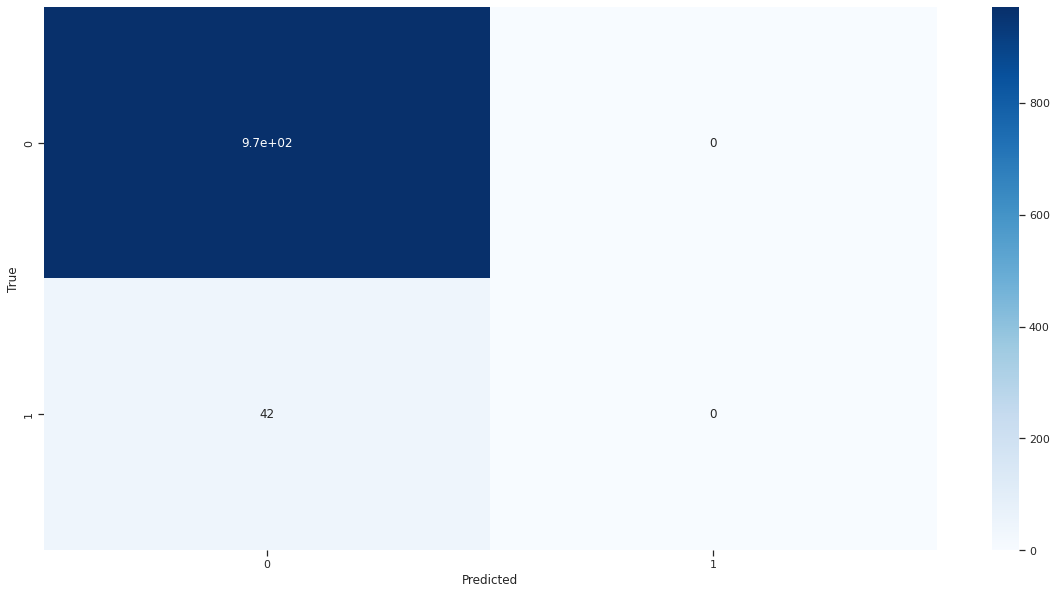

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



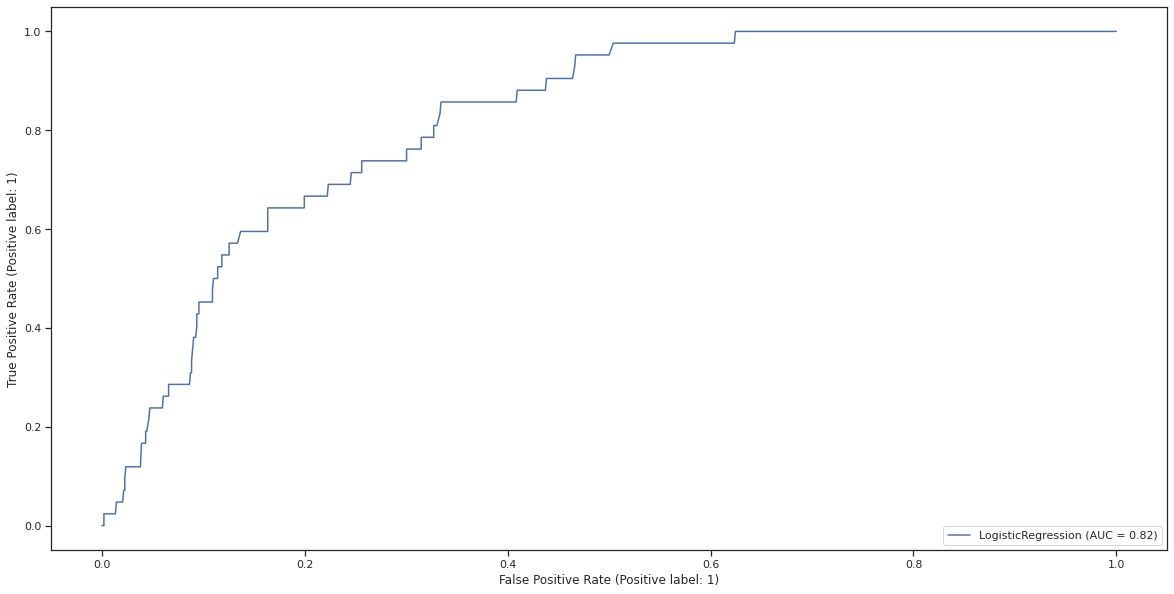

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(logreg, X_test, y_test);

# 5. Dimensionality Reduction[6]:

Apply Principal Component Analysis to reduce the dimension and rebuild the model with reduced fea-
tures,evaluate the model and Compare the output with the evaluation from step 4.

In [ ]:
from sklearn.decomposition import PCA

# Transforming data using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# fit logistic regression model on PCA-transformed data
logreg_pca = LogisticRegression()
logreg_pca.fit(X_train_pca, y_train)

# Comparing performance with and without PCA
score_pca = logreg_pca.score(X_test_pca, y_test)
score = logreg.score(X_test, y_test)

print("Accuracy before PCA: {:.2f}%".format(score * 100))
print("Accuracy after PCA: {:.2f}%".format(score_pca * 100))

Accuracy before PCA: 95.86%
Accuracy after PCA: 95.86%


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
# Application of PCA take 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_pca)

# Reconstruction of data
X_reconstructed = pca.inverse_transform(X_pca)

# Displaying first 5 reconstructed data
print(X_reconstructed[:5])

[[  1.96224629   0.63981318]
 [ 14.99696085  -1.13857704]
 [ -6.03635717   0.49453845]
 [-22.05429887   1.19359846]
 [ -3.03688088   0.54901647]]


In [ ]:
X_reconstructed.shape

(4055, 2)

In [ ]:
X.shape

(5069, 5)